In [2]:
!pip install pandas


     ---------------------------------------- 10.7/10.7 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 186.7/186.7 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 103.1/103.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00


In [6]:
!pip install seaborn

     -------------------------------------- 294.6/294.6 kB 1.8 MB/s eta 0:00:00


In [22]:
!pip install tensorflow

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#Reading datasets
df=pd.read_csv("/users/Adhi/spam.csv",encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


<Axes: xlabel='label', ylabel='count'>

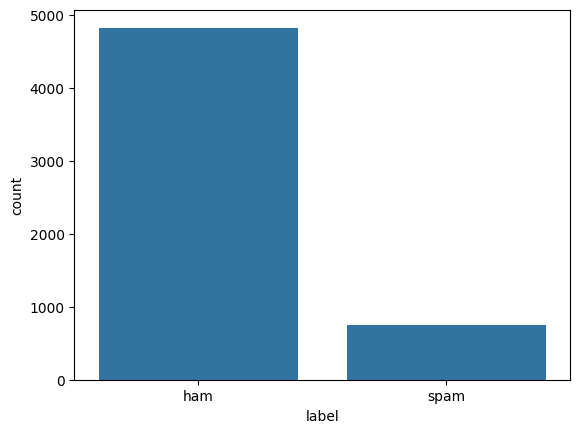

In [4]:
sns.countplot(x=df['label'])

In [5]:
avg_words_len=round(sum([len(i.split())for i in df['Text']])/len(df['Text']))


In [6]:
print(avg_words_len)

15


In [7]:
s=set()
for sent in df['Text']:
    for word in sent.split():
        s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


In [8]:
from sklearn.model_selection import train_test_split
X,y=np.asanyarray(df['Text']),np.asanyarray(df['label_enc'])
new_df=pd.DataFrame({'Text':X,'label':y})
X_train,X_test,y_train,y_test=train_test_split(new_df['Text'],new_df['label'],test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score
 
tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)
 
baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

In [10]:
nb_accuracy=accuracy_score(y_test,baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test,baseline_model.predict(X_test_vec)))

0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [11]:
!pip install scikit-learn

In [30]:
!pip install tensorflow_hub

     -------------------------------------- 85.4/85.4 kB 370.3 kB/s eta 0:00:00


In [12]:
from tensorflow.keras.layers import TextVectorization
 
MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len
 
text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)

In [13]:
sample_sentence='This is a message'
text_vec([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 41,  10,   5, 148,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [14]:
embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

In [15]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)
 
model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])

In [17]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1994880   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128  

In [25]:
history_1=model_1.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test),validation_steps=int(0.2*len(X_test)))

Epoch 1/5
140/140 [==============================] - 7s 33ms/step - loss: 0.6107 - accuracy: 0.9011 - val_loss: 0.5770 - val_accuracy: 0.9758
Epoch 2/5
140/140 [==============================] - 4s 29ms/step - loss: 0.5706 - accuracy: 0.9868 - val_loss: 0.5738 - val_accuracy: 0.9803
Epoch 3/5
140/140 [==============================] - 4s 28ms/step - loss: 0.5660 - accuracy: 0.9951 - val_loss: 0.5726 - val_accuracy: 0.9821
Epoch 4/5
140/140 [==============================] - 4s 29ms/step - loss: 0.5642 - accuracy: 0.9984 - val_loss: 0.5723 - val_accuracy: 0.9803
Epoch 5/5
140/140 [==============================] - 4s 28ms/step - loss: 0.5634 - accuracy: 0.9989 - val_loss: 0.5722 - val_accuracy: 0.9803


<Axes: >

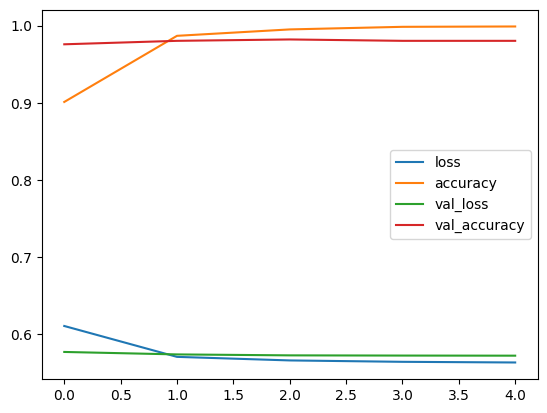

In [26]:
pd.DataFrame(history_1.history).plot()

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
 
def compile_model(model):
    '''
    simply compile the model with adam optimzer
    '''
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
 
def fit_model(model, epochs, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test):
    '''
    fit the model with given epochs, train 
    and test data
    '''
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        validation_steps=int(0.2*len(X_test)))
    return history
 
def evaluate_model(model, X, y):
    '''
    evaluate the model and returns accuracy, 
    precision, recall and f1-score 
    '''
    y_preds = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)
 
    model_results_dict = {'accuracy': accuracy,
                          'precision': precision,
                          'recall': recall,
                          'f1-score': f1}
 
    return model_results_dict

In [28]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
bi_lstm = layers.Bidirectional(layers.LSTM(
    64, activation='tanh', return_sequences=True))(embedding_layer_model)
lstm = layers.Bidirectional(layers.LSTM(64))(bi_lstm)
flatten = layers.Flatten()(lstm)
dropout = layers.Dropout(.1)(flatten)
x = layers.Dense(32, activation='relu')(dropout)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_2 = keras.Model(input_layer, output_layer)
 
compile_model(model_2)  # compile the model
history_2 = fit_model(model_2, epochs=5)  # fit the model

Epoch 1/5
140/140 [==============================] - 18s 60ms/step - loss: 0.0506 - accuracy: 0.9854 - val_loss: 0.1300 - val_accuracy: 0.9722
Epoch 2/5
140/140 [==============================] - 6s 46ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.1128 - val_accuracy: 0.9839
Epoch 3/5
140/140 [==============================] - 7s 47ms/step - loss: 4.7426e-05 - accuracy: 1.0000 - val_loss: 0.1271 - val_accuracy: 0.9821
Epoch 4/5
140/140 [==============================] - 7s 48ms/step - loss: 2.1498e-05 - accuracy: 1.0000 - val_loss: 0.1348 - val_accuracy: 0.9821
Epoch 5/5
140/140 [==============================] - 7s 47ms/step - loss: 1.3186e-05 - accuracy: 1.0000 - val_loss: 0.1403 - val_accuracy: 0.9821


In [31]:
import tensorflow_hub as hub
 
# model with Sequential api
model_3 = keras.Sequential()
 
# universal-sentence-encoder layer 
# directly from tfhub
use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                           trainable=False,
                           input_shape=[],
                           dtype=tf.string,
                           name='USE')
model_3.add(use_layer)
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(64, activation=keras.activations.relu))
model_3.add(layers.Dense(1, activation=keras.activations.sigmoid))
 
compile_model(model_3)
 
history_3 = fit_model(model_3, epochs=5)

Epoch 1/5
140/140 [==============================] - 6s 20ms/step - loss: 0.2872 - accuracy: 0.9147 - val_loss: 0.1119 - val_accuracy: 0.9686
Epoch 2/5
140/140 [==============================] - 2s 16ms/step - loss: 0.0805 - accuracy: 0.9791 - val_loss: 0.0696 - val_accuracy: 0.9767
Epoch 3/5
140/140 [==============================] - 3s 18ms/step - loss: 0.0562 - accuracy: 0.9841 - val_loss: 0.0581 - val_accuracy: 0.9812
Epoch 4/5
140/140 [==============================] - 3s 19ms/step - loss: 0.0487 - accuracy: 0.9838 - val_loss: 0.0522 - val_accuracy: 0.9830
Epoch 5/5
140/140 [==============================] - 3s 19ms/step - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0502 - val_accuracy: 0.9839


In [32]:
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
model_1_results = evaluate_model(model_1, X_test, y_test)
model_2_results = evaluate_model(model_2, X_test, y_test)
model_3_results = evaluate_model(model_3, X_test, y_test)
 
total_results = pd.DataFrame({'MultinomialNB Model':baseline_model_results,
                             'Custom-Vec-Embedding Model':model_1_results,
                             'Bidirectional-LSTM Model':model_2_results,
                             'USE-Transfer learning Model':model_3_results}).transpose()
 
total_results

35/35 [==============================] - 1s 10ms/step


,accuracy,precision,recall,f1-score
MultinomialNB Model,0.962332,1.000000,0.720000,0.837209
Custom-Vec-Embedding Model,0.979372,0.984733,0.860000,0.918149
Bidirectional-LSTM Model,0.982063,0.985075,0.880000,0.929577
USE-Transfer learning Model,0.983857,0.971429,0.906667,0.937931


<Axes: >

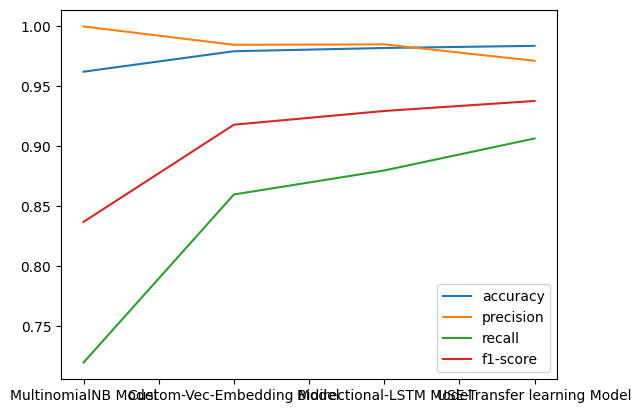

In [33]:
pd.DataFrame(total_results).plot()